Esse pequeno projeto tem como objetivo realizar aálise dos dados de aluguéis

Dicionários de variáveis encontradas na base:

● id
● category  
● title  
● body  
● amenities  
● bathrooms  
● bedrooms  
● currency  
● fee  
● has_photo  
● pets_allowed  
● price  
● price_display  
● price_type  
● square_feet  
● address  
● cityname  
● state  
● latitude  
● longitude  
● source  
● time  


In [112]:


import pandas as pd
import datetime
from datetime import date
import matplotlib.pyplot as plt
import folium
from folium import plugins
import warnings

In [113]:
# Utilizado para nao exibir informacoes de alertas
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Visualizar todas as colunas e linhas do arquivo
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [114]:
# Lendo tabela e visualizando dados
df_original = pd.read_csv("C:\\Users\\Roberth Lourenço\\OneDrive\\Documentos\\Projeto Py\\dados_alugueis\\dataset\\dataset.csv", sep=";", encoding="ISO-8859-1", low_memory = True)

# Visualizando as primeiras linhas
df_original.head(3)

# Visualizando as ultimas linhas
df_original.tail(3)

C:\Users\Roberth Lourenço\AppData\Local\Temp\ipykernel_16744\1499951914.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("C:\\Users\\Roberth Lourenço\\OneDrive\\Documentos\\Projeto Py\\dados_alugueis\\dataset\\dataset.csv", sep=";", encoding="ISO-8859-1", low_memory = True)


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,"Cats,Dogs",1325.0,"$1,325",Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,"Cats,Dogs",931.0,$931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670
99491,5121218844,housing/rent/apartment,Large Remodeled Two BR 1. Five BA Apartment Home,This is a brand new 2 Beds 1. five Bathrooms A...,"Gated,Parking,Wood Floors",1.5,2.0,USD,No,Yes,NaN,1595.0,"$1,595",Monthly,900,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185659


### Técnicas para analisar a qualidade dos dados e tratar os dados

Validando **tipo** de dados, valores **nulos** e **duplicados** no data frame antes de iniciar a análise.

In [115]:
# Visualizando descricao das colunas da tabela
df_original.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.949200e+04,99429.000000,99368.000000,99491.000000,99492.000000,99467.000000,99467.000000,9.949200e+04
mean,5.358321e+09,1.445323,1.728212,1527.057281,956.430688,36.947988,-91.568656,1.559665e+09
std,1.847404e+08,0.547021,0.749200,904.245882,417.571522,4.599461,15.817168,1.105077e+07
min,5.121046e+09,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,5.197950e+09,1.000000,1.000000,1013.000000,729.000000,33.746500,-104.791900,1.550832e+09
50%,5.508673e+09,1.000000,2.000000,1350.000000,900.000000,37.228200,-84.562300,1.568745e+09
75%,5.509007e+09,2.000000,2.000000,1795.000000,1115.000000,39.953000,-77.608200,1.568767e+09
max,5.669439e+09,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800,1.577391e+09


In [116]:
# Identificando valores nulos na tabela
df_original.isnull().sum()

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

In [117]:
# Visualizando linhas duplicadas
df_original[df_original.duplicated()].head(3)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
41958,5508806580,housing/rent/apartment,"Las Vegas, prime location Two BR, Apartment. P...",Live in the middle of it all! South is a pet f...,"Gym,Parking,Pool",2.0,2.0,USD,No,Yes,"Cats,Dogs",1335.0,"$1,335",Monthly,1084,NaN,Las Vegas,NV,36.1536,-115.1965,RentDigs.com,1568754086
41959,5508806428,housing/rent/apartment,Northglenn Value. Pet OK!,"Square footage: 738 square ft, unit number: 06...","Gym,Parking,Pool,Storage",1.0,1.0,USD,No,Yes,"Cats,Dogs",1331.0,"$1,331",Monthly,738,NaN,Northglenn,CO,39.8999,-104.9442,RentDigs.com,1568754072
41960,5508806391,housing/rent/apartment,Apartment in move in condition in District Hei...,Capital Courts has something for everyone. Loc...,"AC,Parking,Playground,Pool",1.5,3.0,USD,No,Yes,NaN,1320.0,"$1,320",Monthly,943,NaN,District Heights,MD,38.8516,-76.8871,RentDigs.com,1568754069


In [118]:
# Contagem de linhas duplicadas na tabela
duplicados = df_original.duplicated()
duplicados.sum()

84

In [119]:
# Removendo as linhas duplicadas
df_original.drop_duplicates(inplace = True)

In [120]:
# Renomeando todas colunas
df_original.columns = ["ID_Imovel",
                    "Categoria",
                    "Titulo",
                    "Descricao",
                    "Comodidades",
                    "Banheiros",
                    "Quartos",
                    "Moeada",
                    "Taxa",
                    "Foto_Anuncio",
                    "Permite_Pets",
                    "VL_Aluguel",
                    "VL_Aluguel_Exibido",
                    "Tipo_Aluguel",
                    "Tamanho",
                    "Endereco",
                    "Cidade",
                    "Estado",
                    "Latitude",
                    "Longitude",
                    "Imobiliaria",
                    "Inclusao"]

In [121]:
# Selecionando as variaveis ou colunas utilizaveis para analise
columns = ["Categoria", "Comodidades", "Banheiros", "Quartos", "Taxa", "Tamanho",
            "Estado", "Imobiliaria", "Inclusao", "VL_Aluguel", "Latitude", "Longitude"]

df_dados = pd.DataFrame(df_original, columns=columns)
df_dados.head(3)

,Categoria,Comodidades,Banheiros,Quartos,Taxa,Tamanho,Estado,Imobiliaria,Inclusao,VL_Aluguel,Latitude,Longitude
0,housing/rent/apartment,NaN,1.0,1.0,No,542,CA,RentLingo,1577360355,2195.0,33.8520,-118.3759
1,housing/rent/apartment,NaN,1.5,3.0,No,1500,VA,RentLingo,1577360340,1250.0,37.0867,-76.4941
2,housing/rent/apartment,NaN,2.0,3.0,No,1650,NC,RentLingo,1577360332,1395.0,35.8230,-78.6438


In [122]:
# Visualizando tamanho do conjunto de dados
df_dados.shape

(99408, 12)

In [123]:
# Tratando valores nulos
# Inserindo a media da coluna Banheiros nas linhas nulas da coluna Banheiro
df_dados["Banheiros"] = df_dados["Banheiros"].fillna(df_dados["Banheiros"].mean())

# Inserindo a media da coluna Quartdos nas linhas nulas da coluna Quartos
df_dados["Quartos"] = df_dados["Quartos"].fillna(df_dados["Quartos"].mean())

In [124]:
# Contagem novamente de valores nulos
df_dados.isnull().sum()

Categoria          0
Comodidades    16034
Banheiros          0
Quartos            0
Taxa               0
Tamanho            0
Estado           302
Imobiliaria        0
Inclusao           0
VL_Aluguel         1
Latitude          25
Longitude         25
dtype: int64

In [125]:
# Removendo as linhas em que a coluna Estado tem valores nulos
df_dados.dropna(subset=["Estado"], how="all", inplace=True)

In [126]:
# Agrupando contagem de valores da coluna Estado
df_dados.groupby(["Estado"]).size()

Estado
AK       58
AL      354
AR      598
AZ     2376
CA    10301
CO     6279
CT      509
DC       93
DE        7
FL     5773
GA     4750
HI       31
IA      372
ID       96
IL     1036
IN      509
KS      899
KY      995
LA     1345
MA     5023
MD     5276
ME       32
MI      710
MN      581
MO     1203
MS      107
MT       87
NC     6293
ND      743
NE     1020
NH      735
NJ     4444
NM       24
NV     2813
NY      659
OH     4899
OK      934
OR      277
PA     1122
RI      119
SC      908
SD       86
TN     1114
TX    11250
UT      809
VA     8278
VT      125
WA     2595
WI      430
WV       13
WY       16
dtype: int64

In [127]:
df_dados.head(5)

,Categoria,Comodidades,Banheiros,Quartos,Taxa,Tamanho,Estado,Imobiliaria,Inclusao,VL_Aluguel,Latitude,Longitude
0,housing/rent/apartment,NaN,1.0,1.0,No,542,CA,RentLingo,1577360355,2195.0,33.8520,-118.3759
1,housing/rent/apartment,NaN,1.5,3.0,No,1500,VA,RentLingo,1577360340,1250.0,37.0867,-76.4941
2,housing/rent/apartment,NaN,2.0,3.0,No,1650,NC,RentLingo,1577360332,1395.0,35.8230,-78.6438
3,housing/rent/apartment,NaN,1.0,2.0,No,820,CA,RentLingo,1577360330,1600.0,38.3622,-121.9712
4,housing/rent/apartment,NaN,1.0,1.0,No,624,NM,RentLingo,1577360308,975.0,35.1038,-106.6110


### Análise de Imóveis

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
# Analisando contagem de valores na coluna Estado

# Contagem de linhas por cada valor da coluna Estado
df_estados = df_dados.groupby(["Estado"]).size().reset_index()

# Adicionando um nome da coluna 0 para Qtd_Imoveis
df_estados.columns = ["Estado", "Qtd_Imoveis"].copy()

# Ordenando df_estados pela descrescente da coluna Qtd_Imoveis
df_estados = df_estados.sort_values(by = ["Qtd_Imoveis"], ascending=False)

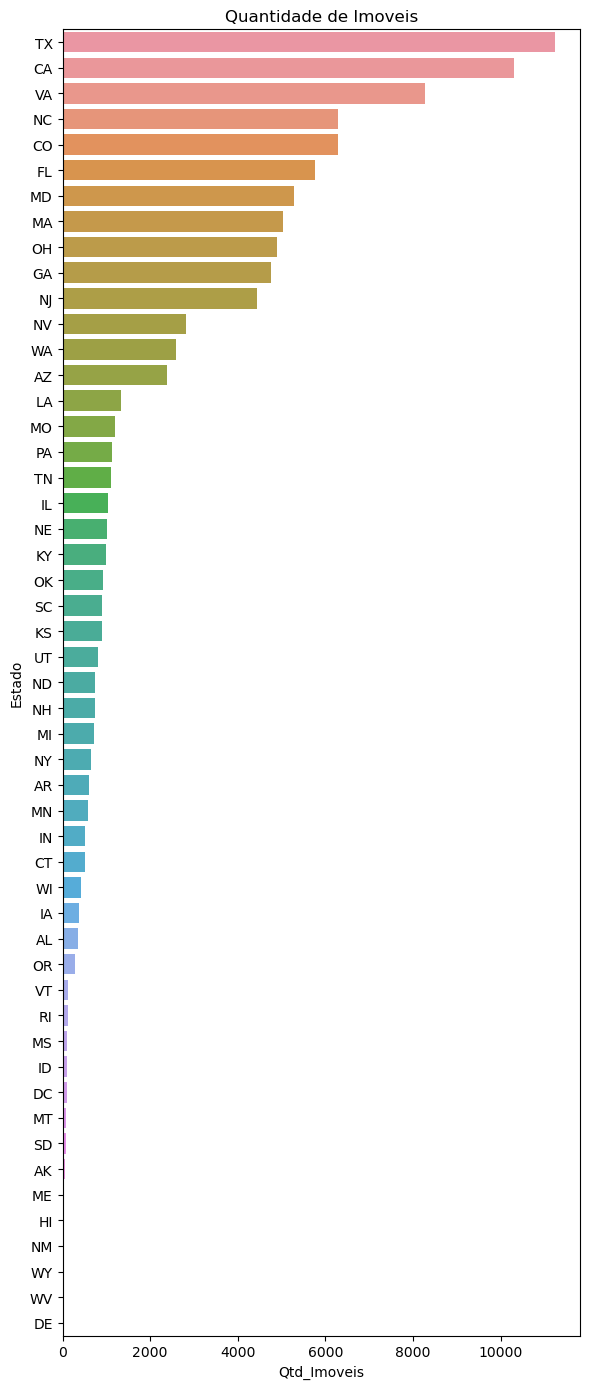

In [130]:
# Grafico com quantidade de Imoveis por Estados

# Definindo tamanho do grafico
plt.rcParams["figure.figsize"] = [6.00, 14.00]
plt.rcParams["figure.autolayout"] = True

# Definindo valores do grafico
sns.barplot(x = df_estados["Qtd_Imoveis"], y = df_estados["Estado"], orient = "h").set_title("Quantidade de Imoveis")

# Salvando grafico em formato png
plt.savefig("Estados.png", format = "png")

# Visualizando grafico
plt.show()

### Conclusão

Com base na análise dos dados de aluguéis, pode ser identificado do maior para o menor os estados com maior disponibilidade de imóveis para aluguéis.

**Principais Estados**:
- **TX**(Texas)
- **CA**(California)
- **VA**(Virginia)


A alta disponibilidade nesses estados pode estar associada ao tamanho populacional, à urbanização intensa e à movimentação econômica que impulsiona o mercado de locação. Essa concentração é um fator importante para investidores, locatários e analistas que acompanham as tendências habitacionais no país.

In [131]:
# Calculando o Share de mercado de Imoveis de cada Estado
total_imoveis = df_estados["Qtd_Imoveis"].sum()

df_estados["Share"] = (df_estados["Qtd_Imoveis"] / total_imoveis * 100).round(2)

df_estados["Share_Acumulado"] = df_estados["Share"].cumsum().round(2)

df_estados.head(5).sort_values(by = ["Share"], ascending=False)

,Estado,Qtd_Imoveis,Share,Share_Acumulado
43,TX,11250,11.35,11.35
4,CA,10301,10.39,21.74
45,VA,8278,8.35,30.09
27,NC,6293,6.35,36.44
5,CO,6279,6.34,42.78


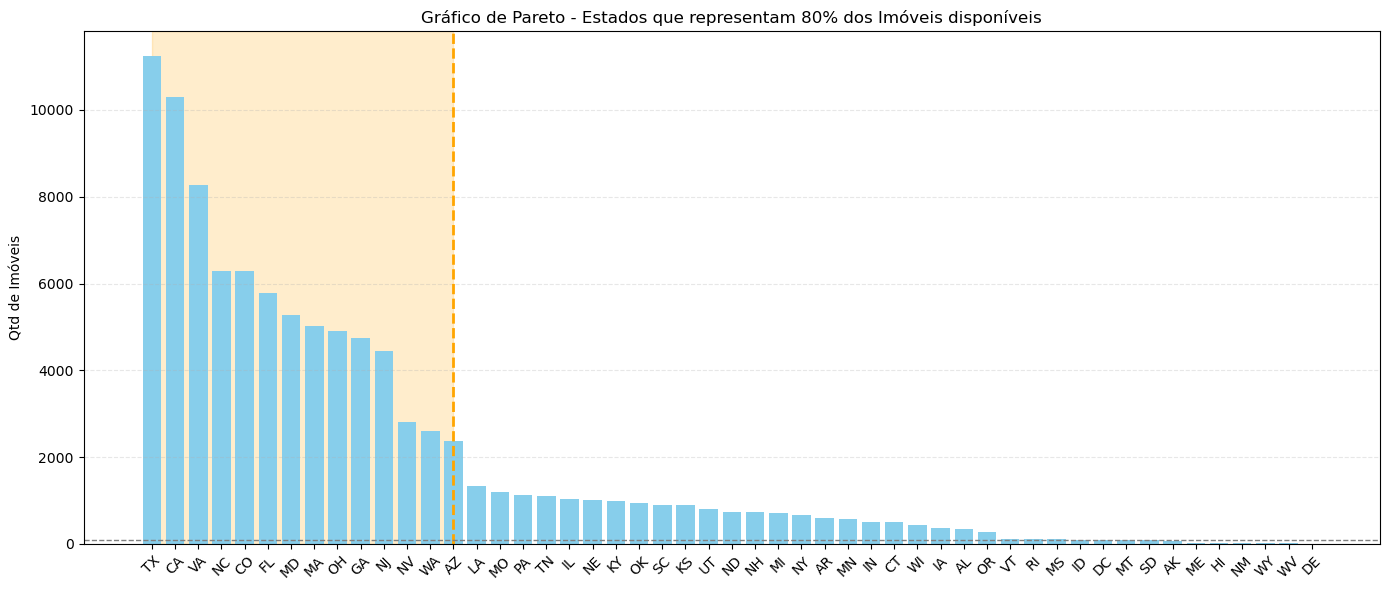

In [132]:
# Análise de Pareto do mercado de Imoveis por Estado
# Ordena e reseta o índice
df_estados = df_estados.sort_values(by="Qtd_Imoveis", ascending=False).reset_index(drop=True)

# Eixo X numérico
x = np.arange(len(df_estados))

# Encontra o ponto de corte dos 80%
pareto_idx = df_estados[df_estados["Share_Acumulado"] >= 80].index[0]

# Cria o gráfico
plt.figure(figsize=(14, 6))

# Faixa laranja de fundo até o estado que fecha 80%
plt.axvspan(0, pareto_idx, color='orange', alpha=0.2)

# Linha laranja tracejada na borda da faixa
plt.axvline(x=pareto_idx, color='orange', linestyle='--', linewidth=2)

# Barras azuis
plt.bar(x, df_estados["Qtd_Imoveis"], color="skyblue")

# Linha dos 80%
plt.axhline(y=80, color='gray', linestyle='--', linewidth=1)

# Eixo X com nomes dos estados
plt.xticks(x, df_estados["Estado"], rotation=45)

# Layout
plt.ylabel("Qtd de Imóveis")
plt.title("Gráfico de Pareto - Estados que representam 80% dos Imóveis disponíveis")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

In [133]:
# Visuaizando a distribuicao dos imoveis no mapa

# Copiando df_dados e tratando valores
df_localizacao = df_dados.copy()

# Removendo linhas com valores nulos nas colunas Latitude e Longitude
df_localizacao = df_localizacao.dropna(subset=["Latitude", "Longitude"])

# Adicioncando nova coluna latitude e longitude
df_localizacao["lat_lon"] = df_localizacao["Latitude"].astype(str) + " - " + df_localizacao["Longitude"].astype(str)

# Agrupando Latitude, Longitude e Lat_lon com a contagem de valores por linha (size())
df_localizacao = df_localizacao.groupby(["Latitude", "Longitude", "lat_lon"]).size().reset_index()

# Alterando nome das colunas
df_localizacao.columns = ["Latitude", "Longitude", "Lat_Lon", "Qtd_Imoveis"]

# Filtrando com loc valores maior que 10 na coluna Qtd_Imoveis
df_localizacao = df_localizacao.loc[(df_localizacao["Qtd_Imoveis"] > 10)]

# Adicionando os valores de Latitude e Longitude em variaveis
latitude = df_localizacao.Latitude.values
longitude = df_localizacao.Longitude.values

# Latitude e Longitude do EUA no mapa com botao de zoom
mapa = folium.Map(location = [37.090240, -95.712891], zoom_start = 5)

# Adicionando marcador no mapa para cada valor de latitude e longitude
for lat, lon in zip(latitude, longitude):
    folium.Marker(location = [lat, lon]).add_to(mapa)

# 
titulo_mapa = "Concentracao de Imoveis por Regiao"
titulo = f'<h1 style="position:absolute;z-index:10000;left:15vw","font-size:20px" >{titulo_mapa}</h1>'
mapa.get_root().html.add_child(folium.Element(titulo))
mapa


In [134]:
# Identificando valoes de media, mediana e moda dos valores de alugueis
print("Media dos alugueis: ", round(df_dados["VL_Aluguel"].mean(), 2))
print("Mediana dos alugueis: ", round(df_dados["VL_Aluguel"].mean(), 2))
print("Moda dos Alugueis: ", round(df_dados["VL_Aluguel"].mode(), 2))

Media dos alugueis:  1525.51
Mediana dos alugueis:  1525.51
Moda dos Alugueis:  0    1350.0
Name: VL_Aluguel, dtype: float64


In [135]:
# Identificando imboliriaria com maior quantidade de anuncios

# Agrupando valores da coluna Imobiliaria e a contagem dos valores
df_imobiliaria = df_dados.groupby(["Imobiliaria"]).size().reset_index()

# Alterando nome das colunas e copiando df_imobiliaria
df_imobiliaria.columns = ["Imobiliaria", "Qtd_Imoveis"].copy()

# Ordendo por descrescente pela coluna Qtd_Imoveis
df_imobiliaria = df_imobiliaria.sort_values(by = ["Qtd_Imoveis"], ascending = False)

# Visualizando quantidade de imoveis por mobiliaria
df_imobiliaria

,Imobiliaria,Qtd_Imoveis
16,RentDigs.com,90611
18,RentLingo,6848
9,ListedBuy,568
5,GoSection8,437
15,RealRentals,268
23,tenantcloud,124
2,BostonApartments,94
11,RENTCafé,41
8,Listanza,28
12,RENTOCULAR,18


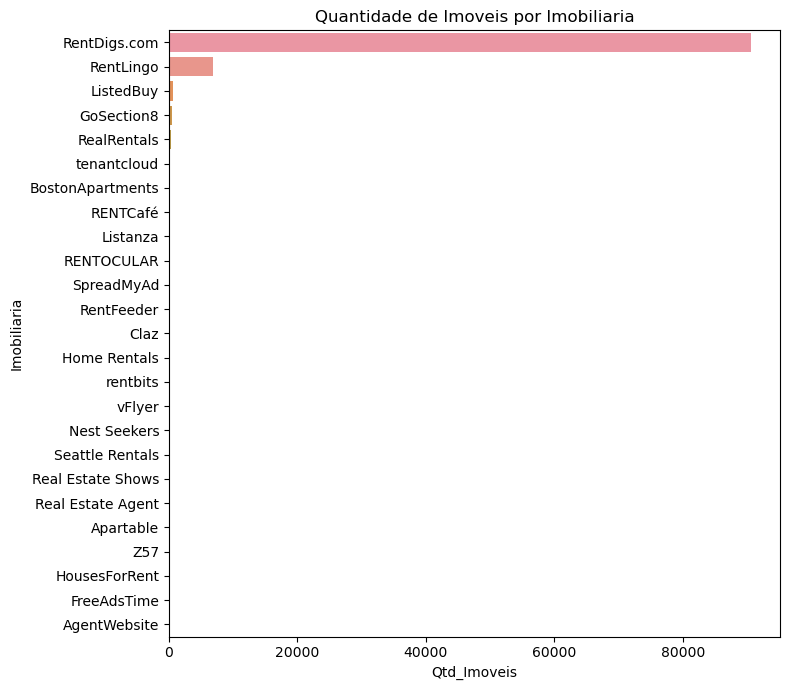

In [144]:
# Grafico com Quantidade de Imoveis por Imobiliaria
plt.rcParams["figure.figsize"] = [08.00, 07.00]
plt.rcParams["figure.autolayout"] = True

# Definindo valores do Grafico
sns.barplot(x = df_imobiliaria["Qtd_Imoveis"], y = df_imobiliaria["Imobiliaria"], orient="h").set_title("Quantidade de Imoveis por Imobiliaria")

# Salvando o grafico
plt.savefig("Imobiliaria.png", format="png")

# Visualizando Grafico
plt.show()

In [137]:
# Tratando coluna Data_Inclusao do anuncio para formato data
def converte_data(x):
    return date.fromtimestamp(x)

df_dados["Data_Inclusao"] = df_dados["Inclusao"].apply(converte_data)
df_dados["Data_Inclusao"] = pd.to_datetime(df_dados["Data_Inclusao"], format = "%Y/%m/%d")
df_dados.head(2)


,Categoria,Comodidades,Banheiros,Quartos,Taxa,Tamanho,Estado,Imobiliaria,Inclusao,VL_Aluguel,Latitude,Longitude,Data_Inclusao
0,housing/rent/apartment,NaN,1.0,1.0,No,542,CA,RentLingo,1577360355,2195.0,33.8520,-118.3759,2019-12-26
1,housing/rent/apartment,NaN,1.5,3.0,No,1500,VA,RentLingo,1577360340,1250.0,37.0867,-76.4941,2019-12-26


In [138]:
# Extraindo valores de data

# Adicionando coluna de Ano
df_dados["Ano"] = df_dados["Data_Inclusao"].dt.year

# Criando variavel de data atual
data_atual = datetime.datetime.now()

# Adicionando coluna de Anos_Anuncio
df_dados["Ano_Anuncio"] = (data_atual.year - df_dados["Ano"])

# Adicionando coluna de Dias_Anuncio
df_dados["Dias_Anuncio"] = (data_atual - df_dados["Data_Inclusao"]).dt.days

# Visualizando df_dados com novas colunas de data
df_dados.head()


,Categoria,Comodidades,Banheiros,Quartos,Taxa,Tamanho,Estado,Imobiliaria,Inclusao,VL_Aluguel,Latitude,Longitude,Data_Inclusao,Ano,Ano_Anuncio,Dias_Anuncio
0,housing/rent/apartment,NaN,1.0,1.0,No,542,CA,RentLingo,1577360355,2195.0,33.8520,-118.3759,2019-12-26,2019,6,1934
1,housing/rent/apartment,NaN,1.5,3.0,No,1500,VA,RentLingo,1577360340,1250.0,37.0867,-76.4941,2019-12-26,2019,6,1934
2,housing/rent/apartment,NaN,2.0,3.0,No,1650,NC,RentLingo,1577360332,1395.0,35.8230,-78.6438,2019-12-26,2019,6,1934
3,housing/rent/apartment,NaN,1.0,2.0,No,820,CA,RentLingo,1577360330,1600.0,38.3622,-121.9712,2019-12-26,2019,6,1934
4,housing/rent/apartment,NaN,1.0,1.0,No,624,NM,RentLingo,1577360308,975.0,35.1038,-106.6110,2019-12-26,2019,6,1934


In [139]:
# A media de dias que o anuncio esta ativo

# Alterando formato da media de Dias_Anuncio para inteiro
print("Em media o anuncio esta", df_dados["Dias_Anuncio"].mean().astype(int), "dias ativos")


Em media o anuncio esta 2139 dias ativos


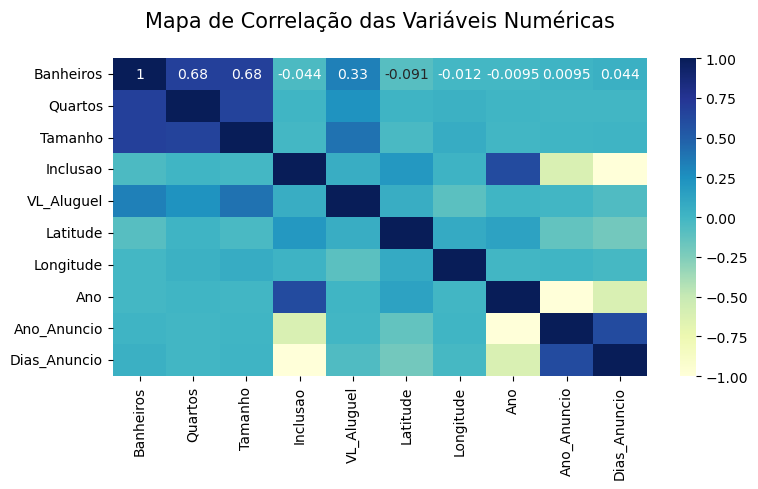

In [140]:
# Gerando o gráfico de correlação com as colunas numéricas

# Filtrando apenas colunas numéricas
df_numerico = df_dados.select_dtypes(include=[float, int])

# Definindo estrutura e valores do grafico
plt.figure(figsize=(8, 5))
sns.heatmap(df_numerico.corr(), annot=True, cmap="YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize=15)

# Visualizado o gráfico
plt.show()



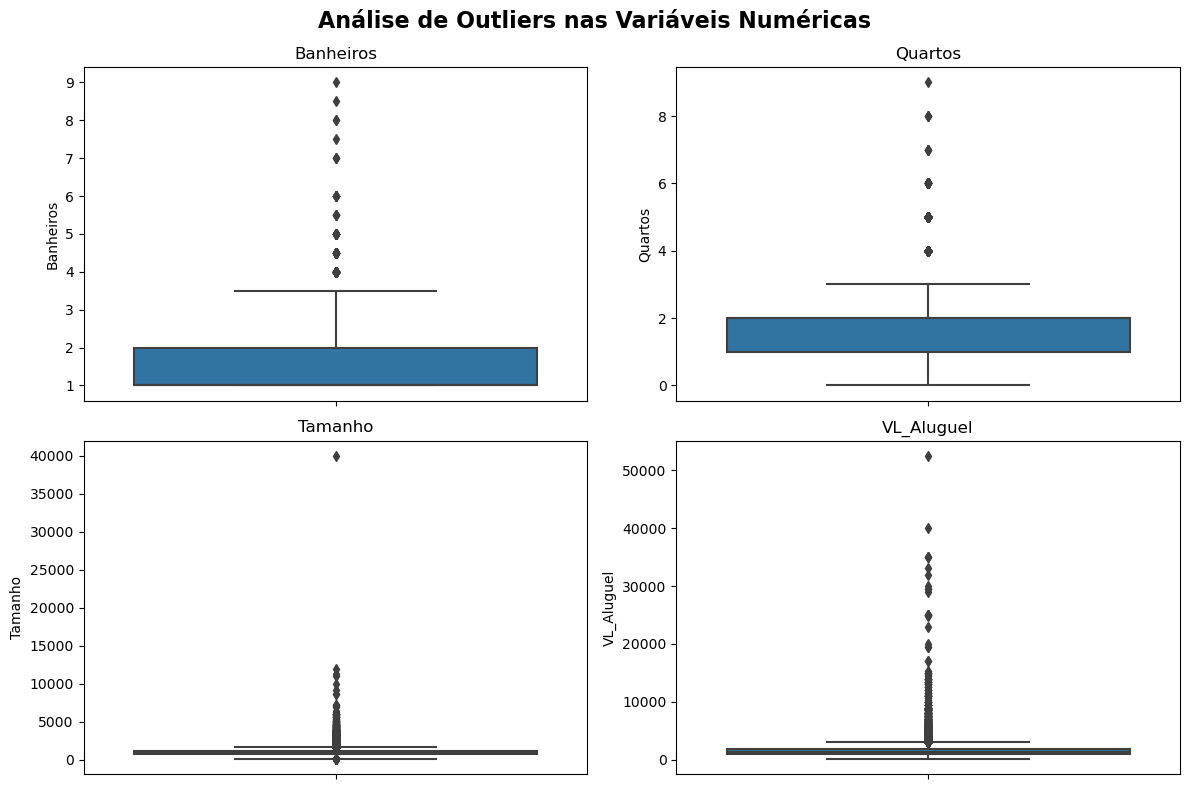

In [148]:
# Identificando Outliers nos dados

variaveis_numericas = ["Banheiros", "Quartos", "Tamanho", "VL_Aluguel"]

# Criando gráfico de Outliers
plt.rcParams["figure.figsize"] = [12.00, 8.00]
plt.rcParams["figure.autolayout"] = True

# Define 2 linhas e 2 colunas para os gráficos
f, axes = plt.subplots(2, 2)

# Adiciona título geral
f.suptitle("Análise de Outliers nas Variáveis Numéricas", fontsize=16, fontweight='bold')

# Plota os boxplots
linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data=df_dados, y=i, ax=axes[linha][coluna])
    axes[linha][coluna].set_title(i)  # Título individual por boxplot (opcional)
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()


In [142]:
# Salvando os dados tratados em Excel e csv

# Selecionando colunas na tabela
columns = ["Imobiliaria", "Banheiros", "Quartos", "Tamanho", "Latitude", "Longitude", "Dias_Anuncio", "VL_Aluguel"]
df_dados = pd.DataFrame(df_dados, columns=columns)

df_dados.to_excel("dados_tratados.xlsx", index = False)
df_dados.to_csv("dados_tratados.csv", index = False)